*Aprenentatge Computacional*

**Integrants:**
- Sebastian Malbaceda Leyva (1681519)


# Cas Kaggle - Video Games Sales 2019

En aquesta pràctica s'abordarà la creació d'un model per tal de predir el nombre de vendes dels diferents videojocs en l'àmbit global que s'han pogut recollir l'any 2019. Es farà les prediccions basant-nos en les diferents característiques del dataset i com ja es pot deduir es farà una regressió per poder obtenir la predicció del nombre de vendes. Seguirem una sèrie de passos per obtenir el resultat, primer analitzarem les dades, les preprocessarem, s'escollirà les mètriques adequades i així aconseguir el millor regressor.

Importem les llibreries necessàries per a la manipulació, visualització i anàlisi de dades.

In [22]:
# LLIBRERIA PER MANIPULACIÓ DE DADES
import pandas as pd

# LLIBRERIA PER TREBALLAR AMB MATRIUS MULTIDIMENSIONALS
import numpy as np

# LLIBRERIA PER DETECTAR VALORS NULS
import missingno as msno

# LLIBRERIA PER VISUALITZAR DADES
import seaborn as sns
import matplotlib.pylab as plt

# LLIBRERIA PER EINES DE PREPROCESSING
from sklearn.preprocessing import MinMaxScaler

### 1. EDA (exploratory data analysis)

In [23]:
dataset = pd.read_csv("datasetVideogame/vgsales-12-4-2019.csv")
dataset.head(20)

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg
5,6,Pokemon Red / Green / Blue Version,pokmon-red,Role-Playing,E,GB,Nintendo,Game Freak,NaN,9.4,...,NaN,NaN,NaN,NaN,1998.0,NaN,http://www.vgchartz.com/game/4030/pokemon-red-...,1,NaN,/games/boxart/full_6442337AmericaFrontccc.png
6,7,New Super Mario Bros.,new-super-mario-bros,Platform,E,DS,Nintendo,Nintendo EAD,NaN,9.1,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/1582/new-super-ma...,1,NaN,/games/boxart/full_2916260AmericaFrontccc.jpg
7,8,Tetris,tetris,Puzzle,E,GB,Nintendo,Bullet Proof Software,NaN,NaN,...,NaN,NaN,NaN,NaN,1989.0,NaN,http://www.vgchartz.com/game/4534/tetris/?regi...,1,NaN,/games/boxart/3740960ccc.jpg
8,9,New Super Mario Bros. Wii,new-super-mario-bros-wii,Platform,E,Wii,Nintendo,Nintendo EAD,NaN,8.6,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/35076/new-super-m...,1,9.1,/games/boxart/full_1410872AmericaFrontccc.jpg
9,10,Minecraft,minecraft,Misc,NaN,PC,Mojang,Mojang AB,NaN,10.0,...,NaN,NaN,NaN,NaN,2010.0,05th Aug 18,http://www.vgchartz.com/game/47724/minecraft/?...,1,NaN,/games/boxart/full_minecraft_1AmericaFront.png


In [24]:
print("El nombre de mostres que tenim a la base de dades és de",dataset.shape[0])
print("El nombre de atributs que tenim a la base de dades és de",dataset.shape[1])

El nombre de mostres que tenim a la base de dades és de 55792
El nombre de atributs que tenim a la base de dades és de 23


Es pot veure que disposem de 23 atributs diferents amb un total de 55792 mostres, que utilitzarem per fer la regresió. A continuació, analitzarem detalladament cada atribut per entendre millor el seu significat i la seva possible influència en la predicció.

In [ ]:
pd.set_option('display.max_rows', None)  # Mostrar todas las filas
print("Informació de cada atribut:")
#print(dataset.info())

"""
#   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            55792 non-null  int64  
 1   Name            55792 non-null  object 
 2   basename        55792 non-null  object 
 3   Genre           55792 non-null  object 
 4   ESRB_Rating     23623 non-null  object 
 5   Platform        55792 non-null  object 
 6   Publisher       55792 non-null  object 
 7   Developer       55775 non-null  object 
 8   VGChartz_Score  0 non-null      float64
 9   Critic_Score    6536 non-null   float64
 10  User_Score      335 non-null    float64
 11  Total_Shipped   1827 non-null   float64
 12  Global_Sales    19415 non-null  float64
 13  NA_Sales        12964 non-null  float64
 14  PAL_Sales       13189 non-null  float64
 15  JP_Sales        7043 non-null   float64
 16  Other_Sales     15522 non-null  float64
 17  Year            54813 non-null  float64
 18  Last_Update     9186 non-null   object 
 19  url             55792 non-null  object 
 20  status          55792 non-null  int64  
 21  Vgchartzscore   799 non-null    float64
 22  img_url         55792 non-null  object 
dtypes: float64(11), int64(2), object(10)
"""

La base de dades conté 23 atributs que descriuen diferents aspectes dels videojocs, incloent informació sobre les seves característiques, vendes i classificacions. A continuació es fa una breu descripció de cada atribut (feature):
- Rank: Classificació de vendes totals del videojoc. És un valor únic per a cada joc que indica la seva posició en el rànquing segons les seves vendes globals. No és útil directament per a entrenar el model, ja que pot ser derivat de les vendes.

- Name: Nom complet del videojoc. És un identificador textual que serveix per a referenciar al joc, però no té rellevància directa per a l'entrenament del model.

- basename: Una versió simplificada del nom del videojoc (sense espais ni caràcters especials). Similar a Name, no influeix directament en el model.

- Genre: Gènere del videojoc (per exemple, Acció, Aventura, Shooter, etc.). És un atribut categòric que pot influir en el nombre de vendes segons la popularitat d'uns certs gèneres.

- ESRB_Ràting: Classificació ESRB del joc (per exemple, E, T, M, etc.), que indica l'audiència recomanada per al joc. És un atribut categòric que podria influir en les vendes depenent del públic objectiu.

- Platform: Plataforma en la qual es juga el videojoc (per exemple, PC, PS4, Xbox). És un atribut categòric que pot influir en les vendes, ja que algunes plataformes tenen mercats més grans.

- Publisher: Empresa que publica el videojoc. És un atribut categòric que pot influir en les vendes segons la reputació o historial de l'empresa.

- Developer: Empresa que desenvolupa el videojoc. Similar a Publisher, pot tenir un impacte indirecte en les vendes depenent de la qualitat dels jocs que produeix.

- VGChartz_Score: Puntuació del joc en VGChartz. Aquest atribut està buit íntegrament en aquest dataset i no és útil per a l'anàlisi.

- Critic_Score: Puntuació mitjana atorgada per crítics al videojoc (de 10). És un atribut numèric que pot correlacionar-se amb les vendes, ja que les crítiques influeixen en l'èxit comercial.

- User_Score: Puntuació mitjana atorgada per usuaris al videojoc (de 10). Similar a Critic_Score, és numèric i pot reflectir l'acceptació del joc entre els jugadors.

- Total_Shipped: Total de còpies enviades del joc. És un atribut numèric que representa la distribució, però té un alt percentatge de valors nuls.

- Global_Sales: Vendes globals del videojoc en milions. És un atribut numèric i la variable objectiu en el problema de regressió.

- NA_Sales: Vendes a Amèrica del Nord (en milions). És un atribut numèric que contribueix al total de vendes globals.

- PAL_Sales: Vendes a Europa (en milions). Similar a NA_Sales, contribueix a les vendes globals.

- JP_Sales: Vendes al Japó (en milions). Específic per al mercat japonès, també forma part del total de vendes globals.

- Other_Sales: Vendes en la resta del món (en milions). Aquest atribut complementa les vendes globals amb regions no incloses en NA_Sales, PAL_Sales o JP_Sales.

- Year: Any de llançament del videojoc. És un atribut numèric que pot ser rellevant per a identificar tendències de vendes segons el temps.

- Last_Update: Data de l'última actualització del registre. És un atribut informatiu, però no influeix directament en el model.

- url: Enllaç al lloc web de VGChartz amb més detalls del joc. És un atribut de text informatiu que no aporta valor per al model.

- estatus: Estat del registre en la base de dades. És un atribut numèric que podria ser útil per a filtrar dades, però no té impacte directe en les prediccions.

- Vgchartzscore: Similar a VGChartz_Score, sembla estar relacionat amb una puntuació del joc, però conté massa valors nuls per a ser útil.

- img_url: Enllaç a la imatge de portada del videojoc. És un atribut informatiu que no s'usa directament en l'anàlisi.

Numèrics->
Rank, status, VGChartz_Score, Critic_Score, User_Score, Total_Shipped, Global_Sales, NA_Sales, PAL_Sales, JP_Sales, Other_Sales, Year, Vgchartzscore.

Categòrics->
ESRB_Rating, Platform, Publisher, Developer.

Objectes->
Name, basename, Genre, Last_Update, url, img_url

A partir de la informació obtinguda, podem observar que els següents atributs tenen valors nuls (NaN), i els llistaré en ordre donis del qual te més valors nuls:
- VGChartz_Score: 0 valors no nuls (completament nul).
- User_Score: 335 valors no nuls, 55457 nuls.
- Total_Shipped: 1827 valors no nuls, 53965 nuls.
- Vgchartzscore: 799 valors no nuls, 55003 nuls.
- Critic_Score: 6536 valors no nuls, 49256 nuls.
- NA_Sales: 12964 valors no nuls, 42828 nuls.
- PAL_Sales: 13189 valors no nuls, 42603 nuls.
- JP_Sales: 7043 valors no nuls, 48749 nuls.
- Other_Sales: 15522 valors no nuls, 40270 nuls.
- Year: 54813 valors no nuls, 9779 nuls.
- ESRB_Ràting: 23623 valors no nuls, 32169 nuls.
- Last_Update: 9186 valors no nuls, 46606 nuls.

Podem observar d'una manera més gràfica mitjançant una taula on un espai gris representa presència de valor i un espai en blanc la absència de valor (NaN). Anem a veure com és la distribució de tots aquests NaNs a cada atribut.

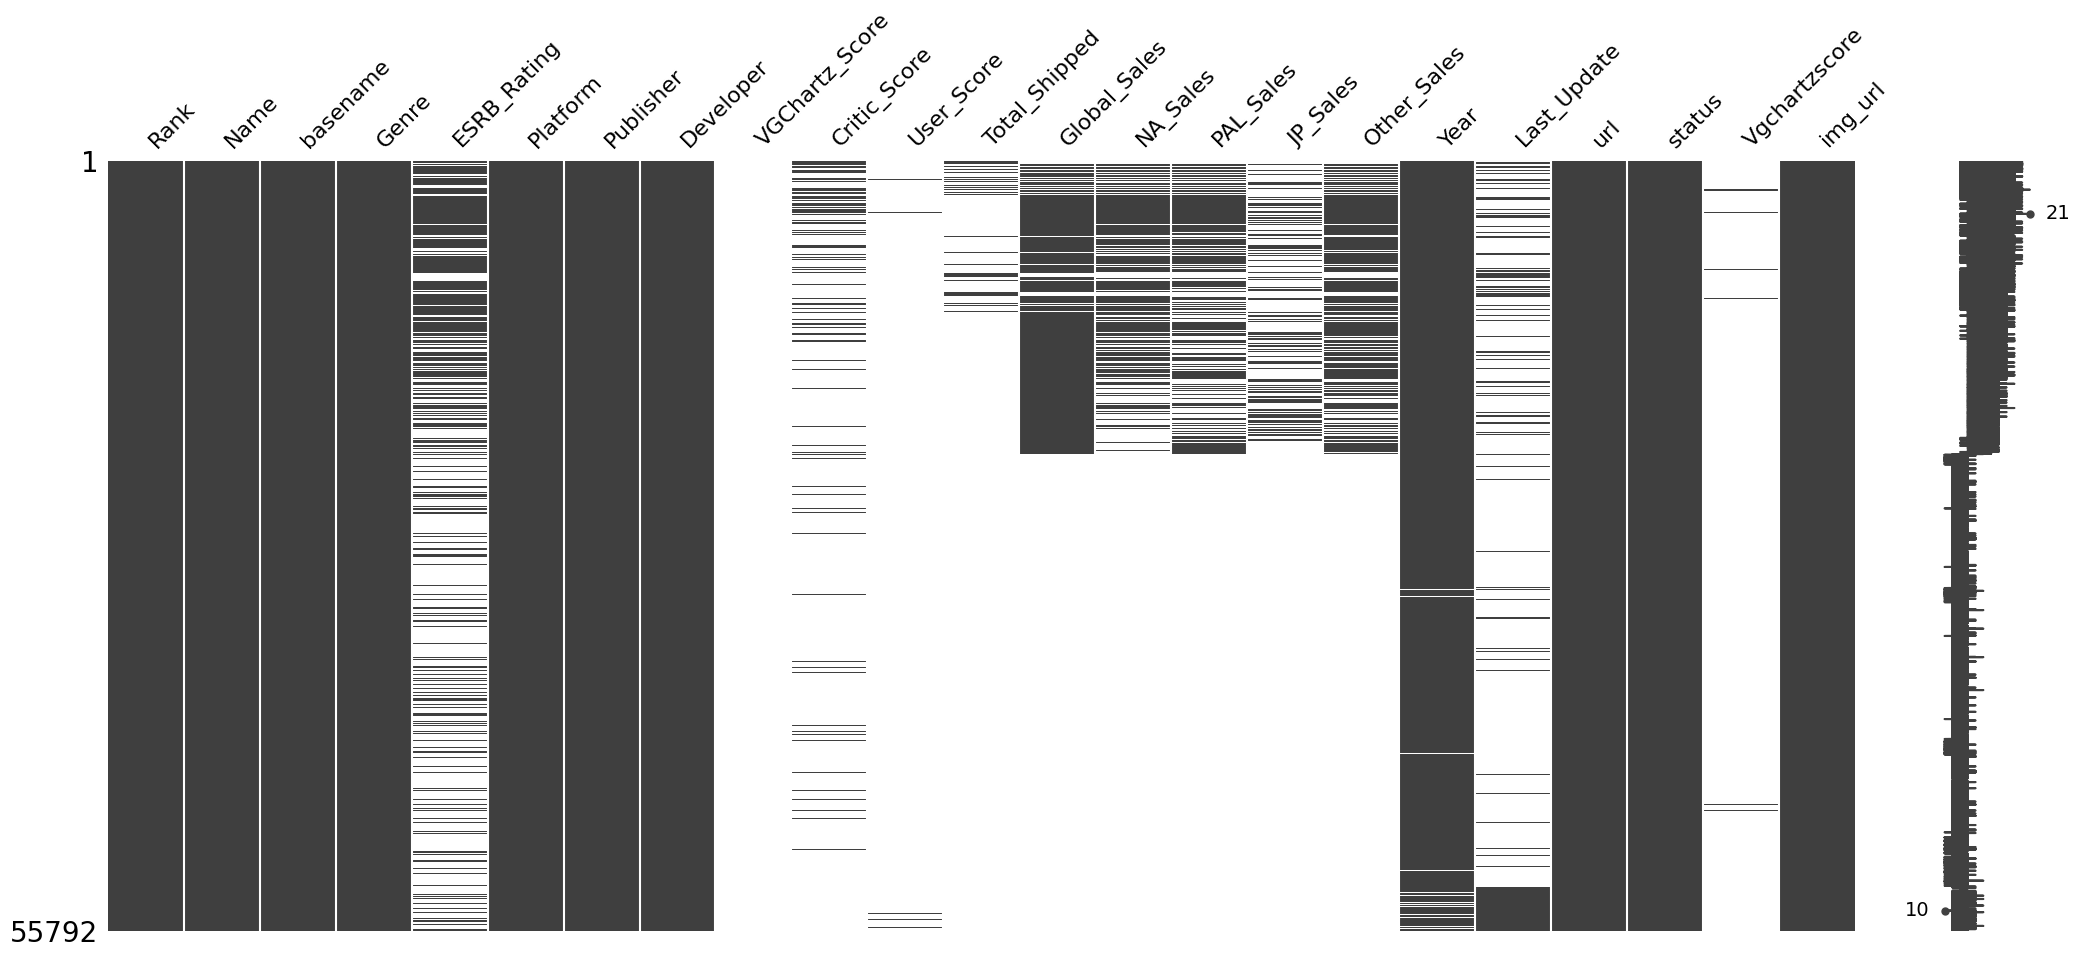

In [26]:
msno.matrix(dataset)
plt.show()